In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
from imblearn.over_sampling import SMOTE

#먼저 데이터 읽어오기
df=pd.read_excel('../optimal_data3_1/'+'Continous_2weeks_2day_1term.xlsx')
df.head()
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X)

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]

[0]Accuracy : 0.4526511508623453
[0]F1score : 0.441804399277101
[0]Precision : 0.4480370526363193
[0]Recall : 0.4526511508623453



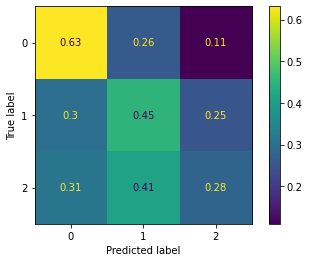

[1]Accuracy : 0.5888436429448646
[1]F1score : 0.5896347807982765
[1]Precision : 0.5949427248992033
[1]Recall : 0.5888436429448646



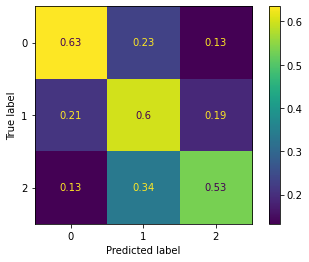

[2]Accuracy : 0.5812924534180843
[2]F1score : 0.5837846078898812
[2]Precision : 0.5897798828588967
[2]Recall : 0.5812924534180843



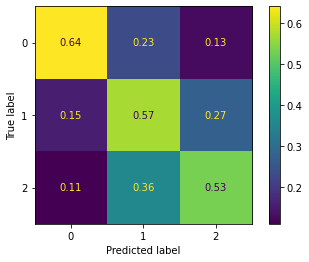

[3]Accuracy : 0.5801507848226425
[3]F1score : 0.582291871702435
[3]Precision : 0.586880849565675
[3]Recall : 0.5801507848226425



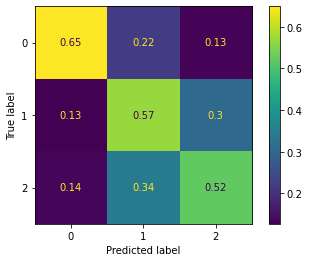

[4]Accuracy : 0.5974208531964308
[4]F1score : 0.6003007042605099
[4]Precision : 0.6074806760509928
[4]Recall : 0.5974208531964308



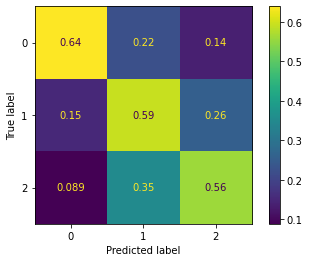

[5]Accuracy : 0.5433951162106502
[5]F1score : 0.5537548739876438
[5]Precision : 0.5793239193965414
[5]Recall : 0.5433951162106502



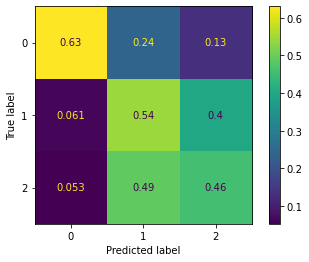

[6]Accuracy : 0.5916991841078396
[6]F1score : 0.5961071776483438
[6]Precision : 0.6146947664164302
[6]Recall : 0.5916991841078396



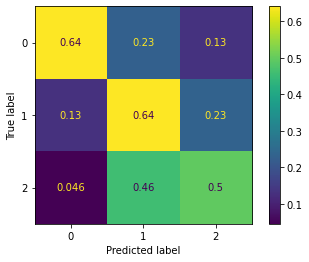

[7]Accuracy : 0.5263655152051964
[7]F1score : 0.5259444983341214
[7]Precision : 0.5267748106577487
[7]Recall : 0.5263655152051964



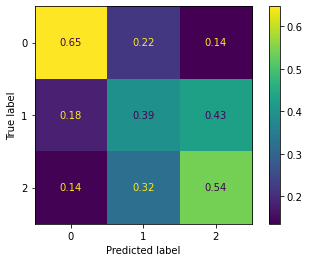

[8]Accuracy : 0.5763023614572208
[8]F1score : 0.5800842821113021
[8]Precision : 0.5953300893160344
[8]Recall : 0.5763023614572208



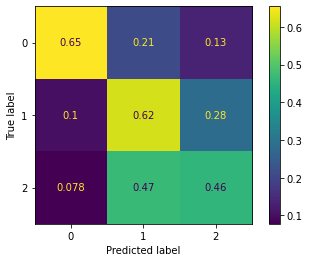

[9]Accuracy : 0.6063861008393496
[9]F1score : 0.6125123112833315
[9]Precision : 0.6308367077509228
[9]Recall : 0.6063861008393496



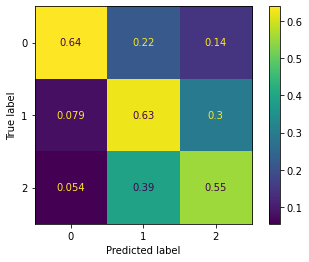

In [5]:
#한 사람당 데이터 수
Count_1=int(181*0.1)
#한 사람당 데이터 수
Count_2=181

X_test=pd.DataFrame()
X_train=pd.DataFrame()
y_test=pd.DataFrame()
y_train=pd.DataFrame()
empty=pd.DataFrame()

for i in range(10):
    X_test=empty
    X_train=empty
    y_test=empty
    y_train=empty
    for j in range(322):
        X_temp_test=X.iloc[Count_2*j+Count_1*i:Count_2*j+Count_1*(i+1)]
        X_test=pd.concat([X_test,X_temp_test])
        X_temp_train=X.iloc[Count_2*j+Count_1:Count_2*(j+1)]
        X_train=pd.concat([X_train,X_temp_train])
        
        y_temp_test=y.iloc[Count_2*j+Count_1*i:Count_2*j+Count_1*(i+1)]
        y_test=pd.concat([y_test,y_temp_test])
        y_temp_train=y.iloc[Count_2*j+Count_1:Count_2*(j+1)]
        y_train=pd.concat([y_train,y_temp_train])
     
    
    #SMOTE 적용
    smote = SMOTE(random_state=0)
    X_train,y_train = smote.fit_resample(X_train,y_train)
    X_test,y_test = smote.fit_resample(X_test,y_test)

    
    #모든 라벨 데이터 일차원으로 변환
    
    y_train=y_train.to_numpy()
    y_train=np.ravel(y_train, order='C')
    
    y_test=y_test.to_numpy()
    y_test=np.ravel(y_test, order='C')
    
    
    #모델 정의, 예측
    #여기서 문제 생기는듯
    model = SVC(kernel='rbf', C=8, gamma=0.1)
    model.fit(X_train,y_train) # rbf Kernel
    predict=model.predict(X_test)
        
    
    #Accuracy
    print("[{}]Accuracy : {}".format(i,model.score(X_test,y_test)))

    #f1score
    f1 = f1_score(y_test,predict, average='weighted')
    print("[{}]F1score : {}".format(i,f1))
    
    #precision/recall
    list=sk(y_test,predict,average='weighted')
    print("[{}]Precision : {}".format(i,list[0]))
    print("[{}]Recall : {}".format(i,list[1]))
    print("")

    #결과 배열에 넣기
    Result[i][0]=model.score(X_test,y_test)
    Result[i][1]=f1
    Result[i][2]=list[0]
    Result[i][3]=list[1]    
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    confusion_matrix(y_test, predict)

    cm = confusion_matrix(y_test, predict, labels=[0,1,2],normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    filename=("ConfusionMatrix_"+str(i))
    plt.savefig(filename+".png")
    plt.show()

In [6]:
Result_df=pd.DataFrame(Result,columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

,Accuracy,F1-Score,Precision,Recall
0,0.452651,0.441804,0.448037,0.452651
1,0.588844,0.589635,0.594943,0.588844
2,0.581292,0.583785,0.589780,0.581292
3,0.580151,0.582292,0.586881,0.580151
4,0.597421,0.600301,0.607481,0.597421
5,0.543395,0.553755,0.579324,0.543395
6,0.591699,0.596107,0.614695,0.591699
7,0.526366,0.525944,0.526775,0.526366
8,0.576302,0.580084,0.595330,0.576302
9,0.606386,0.612512,0.630837,0.606386


In [7]:
print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

Average of Accuracy 0.5644507163064624
Average of F1-Score 0.5666219507292947
Average of Precision 0.5774081479548764
Average of Recall 0.5644507163064624


In [8]:
Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy']=Result_df['Accuracy']
A=[Result_df['Accuracy'].mean(),Result_df['F1-Score'].mean(),Result_df['Precision'].mean(),Result_df['Recall'].mean()]
A=pd.DataFrame(A,columns=['Accuracy'])
Matrix=pd.concat([Matrix,A])
Matrix=Matrix.transpose()
Matrix.to_excel('./PFMatrix.xlsx')